In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Einlesen der Daten
haushalte = pd.read_csv("Data/haushalte.csv", sep=";", encoding='ISO-8859-1')
fahrzeuge = pd.read_csv("Data/fahrzeuge.csv", sep=";", encoding='ISO-8859-1')

C:\Users\larim\AppData\Local\Temp\ipykernel_10932\266891642.py:2: DtypeWarning: Columns (53,66) have mixed types. Specify dtype option on import or set low_memory=False.
  haushalte = pd.read_csv("Data/haushalte.csv", sep=";", encoding='ISO-8859-1')


In [3]:
# fehlende Effizienz mit Effizienzklasse D ersetzen
fahrzeuge['mf_eekat'] = fahrzeuge['mf_eekat'].fillna('D')

# Fahrzeuge nach Haushalt, Art und Effizienz sortieren
fz_sorted = fahrzeuge.sort_values(by=['HHNR', 'fahrzeugart', 'mf_eekat'], ascending=[True, True, False])

# pro Haushalt nur erstes Fahrzeug behalten (Auto, falls Auto und Motorrad / schlechteste Effizienz, falls mehrere Autos, etc.)
fz_agg = fz_sorted.groupby('HHNR').first().reset_index()

fz_agg.head()

,HHNR,WM,fznum,fahrzeugart,f30400,f30600_31500,f30601_31501,f30700_hpnr1,f30700_hpnr2,f30700_hpnr3,...,mf_gege1,mf_zylin,mf_nuzla,Leergew,mf_antri,mf_leikw,mf_co2wt,mf_tysnr,ET_Verbrauch,EL_Verbrauch
0,110001,1.391603,2,1,1,-97,-99,2,-99,-99,...,-99,-99,-99,-99.0,-99,-99,-99,1LD822,-99.0,-99.0
1,110008,0.484276,1,1,1,2012,9,1,2,-99,...,2050,4,504,1546.0,1,14700,155,1CE433,6.7,-99.0
2,110011,0.161184,1,1,1,-97,-99,3,-99,-99,...,-99,-99,-99,-99.0,-99,-99,-99,None,-99.0,-99.0
3,110026,1.036084,1,2,-99,2015,-99,-99,-99,-99,...,-99,-99,-99,-99.0,-99,-99,-99,None,-99.0,-99.0
4,110027,0.584383,3,1,1,-97,-99,3,-99,-99,...,-99,-99,-99,-99.0,-99,-99,-99,1HA350,-99.0,-99.0


In [4]:
# Umbennen der Spalten
fz_agg = fz_agg.rename(columns={
    "HHNR": "Haushaltsnummer",
    "WM": "Haushaltsgewicht",
    "fznum": "Fahrzeugnummer",
    "fahrzeugart": "Fahrzeugtyp",
    "f30400": "Treibstoff",
    "f30600_31500": "Inverkehrssetzung_Jahr",
    "f30601_31501": "Inverkehrssetzung_Monat",
    "f30700_hpnr1": "Hauptfahrer_1",
    "f30700_hpnr2": "Hauptfahrer_2",
    "f30700_hpnr3": "Hauptfahrer_3",
    "f30700_hpnr4": "Hauptfahrer_4",
    "f30700_hpnr5": "Hauptfahrer_5",
    "f30800_31600": "Kilometerstand",
    "f30900_31700": "Km_letzte_12_Monate",
    "f31000_31800": "Km_Ausland",
    "f31400": "Hubraum",
    "mofis": "MOFIS_Abfrage",
    "mf_eekat": "Effizienzklasse",
    "mf_emcod": "Emissionscode",
    "mf_getri": "Getriebe",
    "mf_gege1": "Gesamtgewicht",
    "mf_zylin": "Zylinder",
    "mf_nuzla": "Nutzlast",
    "Leergew": "Leergewicht",
    "mf_antri": "Antriebsart",
    "mf_leikw": "Motorleistung",
    "mf_co2wt": "CO2_Ausstoss",
    "mf_tysnr": "Typenscheinnr",
    "ET_Verbrauch": "Verbrauch_NEFL_l_100km",
    "EL_Verbrauch": "Verbrauch_NEFL_kWh_100km"
})

In [5]:
fz_agg.head()

,Haushaltsnummer,Haushaltsgewicht,Fahrzeugnummer,Fahrzeugtyp,Treibstoff,Inverkehrssetzung_Jahr,Inverkehrssetzung_Monat,Hauptfahrer_1,Hauptfahrer_2,Hauptfahrer_3,...,Gesamtgewicht,Zylinder,Nutzlast,Leergewicht,Antriebsart,Motorleistung,CO2_Ausstoss,Typenscheinnr,Verbrauch_NEFL_l_100km,Verbrauch_NEFL_kWh_100km
0,110001,1.391603,2,1,1,-97,-99,2,-99,-99,...,-99,-99,-99,-99.0,-99,-99,-99,1LD822,-99.0,-99.0
1,110008,0.484276,1,1,1,2012,9,1,2,-99,...,2050,4,504,1546.0,1,14700,155,1CE433,6.7,-99.0
2,110011,0.161184,1,1,1,-97,-99,3,-99,-99,...,-99,-99,-99,-99.0,-99,-99,-99,None,-99.0,-99.0
3,110026,1.036084,1,2,-99,2015,-99,-99,-99,-99,...,-99,-99,-99,-99.0,-99,-99,-99,None,-99.0,-99.0
4,110027,0.584383,3,1,1,-97,-99,3,-99,-99,...,-99,-99,-99,-99.0,-99,-99,-99,1HA350,-99.0,-99.0


In [11]:
fz_agg.columns

Index(['Haushaltsnummer', 'Haushaltsgewicht', 'Fahrzeugnummer', 'Fahrzeugtyp',
       'Treibstoff', 'Inverkehrssetzung_Jahr', 'Inverkehrssetzung_Monat',
       'Hauptfahrer_1', 'Hauptfahrer_2', 'Hauptfahrer_3', 'Hauptfahrer_4',
       'Hauptfahrer_5', 'Kilometerstand', 'Km_letzte_12_Monate', 'Km_Ausland',
       'Hubraum', 'MOFIS_Abfrage', 'Effizienzklasse', 'Emissionscode',
       'Getriebe', 'Gesamtgewicht', 'Zylinder', 'Nutzlast', 'Leergewicht',
       'Antriebsart', 'Motorleistung', 'CO2_Ausstoss', 'Typenscheinnr',
       'Verbrauch_NEFL_l_100km', 'Verbrauch_NEFL_kWh_100km'],
      dtype='object')

C:\Users\larim\AppData\Local\Temp\ipykernel_10932\1198689348.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gewicht_verteilung = fz_agg.groupby(['Treibstoff', 'Gewichtskategorie']).size().unstack(fill_value=0)


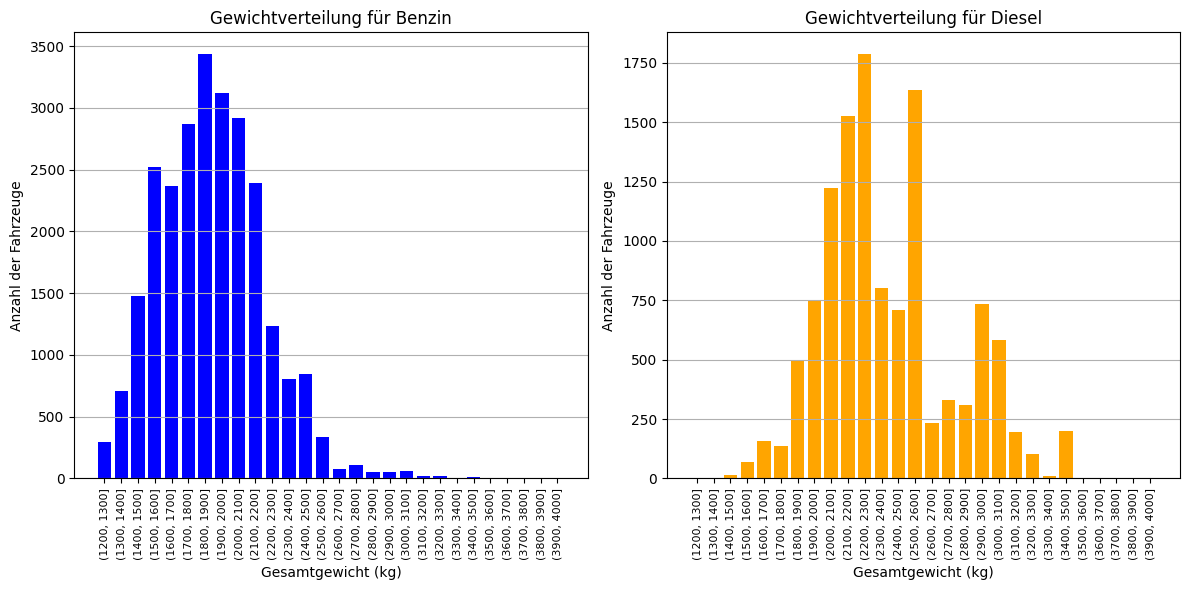

In [36]:
# Kategorien für das Gewicht in 100er-Schritten erstellen
bins = range(1200, 4100, 100)  # Von 1200 bis 4000 in Schritten von 100
fz_agg['Gewichtskategorie'] = pd.cut(fz_agg['Gesamtgewicht'], bins)

# Zählen der Fahrzeuge in jeder Gewichtskategorie für Diesel und Benzin
gewicht_verteilung = fz_agg.groupby(['Treibstoff', 'Gewichtskategorie']).size().unstack(fill_value=0)

# Barplot für Benzin
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(gewicht_verteilung.columns.astype(str), gewicht_verteilung.loc[1], color='blue')
plt.title('Gewichtverteilung für Benzin')
plt.xlabel('Gesamtgewicht (kg)')
plt.ylabel('Anzahl der Fahrzeuge')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y')

# Barplot für Diesel
plt.subplot(1, 2, 2)
plt.bar(gewicht_verteilung.columns.astype(str), gewicht_verteilung.loc[2], color='orange')
plt.title('Gewichtverteilung für Diesel')
plt.xlabel('Gesamtgewicht (kg)')
plt.ylabel('Anzahl der Fahrzeuge')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y')

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()

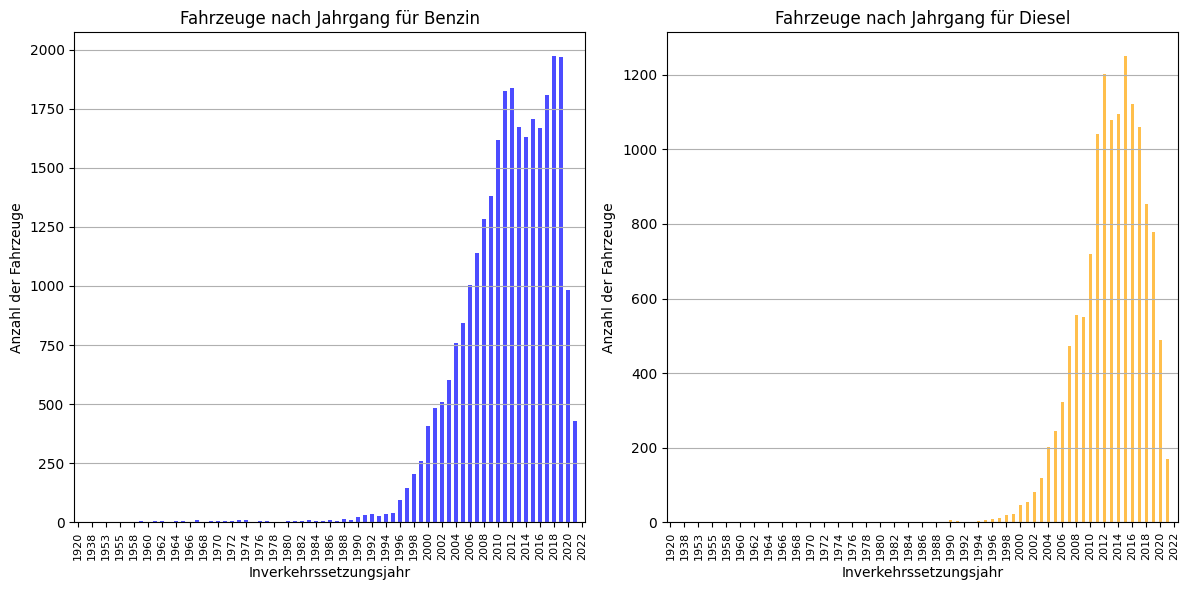

In [46]:
# Zählen der Fahrzeuge nach Jahrgang und Treibstoff
jahrgang_verteilung = fz_agg.groupby(['Inverkehrssetzung_Jahr', 'Treibstoff']).size().unstack(fill_value=0)

# Barplot für Benzin
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
jahrgang_verteilung[1].plot(kind='bar', color='blue', alpha=0.7)  # Treibstoff = 1 (Benzin)
plt.title('Fahrzeuge nach Jahrgang für Benzin')
plt.xlabel('Inverkehrssetzungsjahr')
plt.ylabel('Anzahl der Fahrzeuge')
plt.xticks(ticks=range(0, len(jahrgang_verteilung.index), 2), 
           labels=jahrgang_verteilung.index[::2].astype(int), rotation=90, fontsize=8)
plt.grid(axis='y')

# Barplot für Diesel
plt.subplot(1, 2, 2)
jahrgang_verteilung[2].plot(kind='bar', color='orange', alpha=0.7)  # Treibstoff = 2 (Diesel)
plt.title('Fahrzeuge nach Jahrgang für Diesel')
plt.xlabel('Inverkehrssetzungsjahr')
plt.ylabel('Anzahl der Fahrzeuge')
plt.xticks(ticks=range(0, len(jahrgang_verteilung.index), 2), 
           labels=jahrgang_verteilung.index[::2].astype(int), rotation=90, fontsize=8)
plt.grid(axis='y')

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()

In [60]:
def categorize_fuel(row):
    # Kategorie für Motorräder
    # Hier wird der Flottendurchschnitt Motorrad genommen
    if row['Fahrzeugtyp'] == 2:
        return 'Motorrad'
    
    # Kategorie für Benzin mit Unterscheidung nach Alter und Größe
    # Kategorieneinteilung erfolgt anhand dem Umweltrechner Verkehr von Energieschweiz
    elif row['Treibstoff'] == 1:
        if row['Inverkehrssetzung_Jahr'] >= 2015 and row['Gesamtgewicht'] >= 2100:
            return 'Benzin - Neu & sehr schwer'
        elif row['Inverkehrssetzung_Jahr'] >= 2015 and row['Gesamtgewicht'] < 1300:
            return 'Benzin - Neu & Leicht'
        elif row['Inverkehrssetzung_Jahr'] < 2015 and row['Gesamtgewicht'] >= 2100:
            return 'Benzin - Alt & sehr schwer'
        elif row['Inverkehrssetzung_Jahr'] < 2015 and row['Gesamtgewicht'] < 1300:
            return 'Benzin - Alt & Leicht'
        elif row['Inverkehrssetzung_Jahr'] >= 2015 and 1301 <= row['Gesamtgewicht'] < 1600:
            return 'Benzin - Neu & Mittel'
        elif row['Inverkehrssetzung_Jahr'] < 2015 and 1301 <= row['Gesamtgewicht'] < 1600:
            return 'Benzin - Alt & Mittel'
        elif row['Inverkehrssetzung_Jahr'] >= 2015 and 1601 <= row['Gesamtgewicht'] < 2100:
            return 'Benzin - Neu & Schwer'
        elif row['Inverkehrssetzung_Jahr'] < 2015 and 1601 <= row['Gesamtgewicht'] < 2100:
            return 'Benzin - Alt & Schwer'
    
    # Kategorie für Diesel mit Unterscheidung nach Alter und Größe
    # Kategorieneinteilung erfolgt anhand dem Umweltrechner Verkehr von Energieschweiz
    elif row['Treibstoff'] == 2:
        if row['Inverkehrssetzung_Jahr'] >= 2015 and row['Gesamtgewicht'] >= 2100:
            return 'Diesel - Neu & sehr schwer'
        elif row['Inverkehrssetzung_Jahr'] >= 2015 and row['Gesamtgewicht'] < 1300:
            return 'Diesel - Neu & Leicht'
        elif row['Inverkehrssetzung_Jahr'] < 2015 and row['Gesamtgewicht'] >= 2100:
            return 'Diesel - Alt & sehr schwer'
        elif row['Inverkehrssetzung_Jahr'] < 2015 and row['Gesamtgewicht'] < 1300:
            return 'Diesel - Alt & Leicht'
        elif row['Inverkehrssetzung_Jahr'] >= 2015 and 1301 <= row['Gesamtgewicht'] < 1600:
            return 'Diesel - Neu & Mittel'
        elif row['Inverkehrssetzung_Jahr'] < 2015 and 1301 <= row['Gesamtgewicht'] < 1600:
            return 'Diesel - Alt & Mittel'
        elif row['Inverkehrssetzung_Jahr'] >= 2015 and 1601 <= row['Gesamtgewicht'] < 2100:
            return 'Diesel - Neu & Schwer'
        elif row['Inverkehrssetzung_Jahr'] < 2015 and 1601 <= row['Gesamtgewicht'] < 2100:
            return 'Diesel - Alt & Schwer'
    
    # Kategorie für Hybrid
    elif row['Treibstoff'] in [6, 8]:
        return 'Hybrid'
    
    # Kategorie für Elektrisch
    # Hier wird der Flottendurchschnitt Batterieelektrisch genommen
    elif row['Treibstoff'] == 7:
        return 'Elektrisch'
    
    # Standardkategorie für alle anderen Fälle
    # Hier wird der Gesamtflottendurchschnitt genommen
    else:
        return 'Andere'

In [57]:
# Anwendung der Funktion auf den DataFrame 'fz_agg'
fz_agg['Fahrzeugkategorie'] = fz_agg.apply(categorize_fuel, axis=1)

In [58]:
# Anzeige der Verteilung der Fahrzeugkategorien
fz_agg['Fahrzeugkategorie'].value_counts()

Fahrzeugkategorie
Benzin - Alt & Schwer         9265
Diesel - Alt & sehr schwer    5207
Benzin - Neu & Schwer         5198
Diesel - Neu & sehr schwer    4046
Benzin - Alt & Mittel         3561
Benzin - Alt & sehr schwer    3331
Benzin - Neu & sehr schwer    2926
Diesel - Alt & Schwer         1794
Hybrid                        1584
Benzin - Neu & Mittel          953
Diesel - Neu & Schwer          887
Andere                         878
Benzin - Alt & Leicht          419
Elektrisch                     387
Motorrad                       307
Benzin - Neu & Leicht          127
Diesel - Alt & Mittel           72
Diesel - Neu & Mittel            4
Diesel - Alt & Leicht            3
Name: count, dtype: int64

In [59]:
# Durchschnittsjahrgang und Durchschnittsgewicht für jede Kategorie berechnen
durchschnittswerte = fz_agg.groupby('Fahrzeugkategorie').agg({
    'Inverkehrssetzung_Jahr': 'median',
    'Gesamtgewicht': 'mean'
}).reset_index()

# Spalten umbenennen für bessere Lesbarkeit
durchschnittswerte.columns = ['Fahrzeugkategorie', 'Durchschnittsjahrgang', 'Durchschnittsgewicht']

# Ergebnis anzeigen
print(durchschnittswerte)

             Fahrzeugkategorie  Durchschnittsjahrgang  Durchschnittsgewicht
0                       Andere                 2013.0           1983.955414
1        Benzin - Alt & Leicht                 2007.0           1168.128878
2        Benzin - Alt & Mittel                 2008.0           1494.337546
3        Benzin - Alt & Schwer                 2009.0           1856.692175
4   Benzin - Alt & sehr schwer                 2010.0           2296.545782
5        Benzin - Neu & Leicht                 2017.0           1247.055118
6        Benzin - Neu & Mittel                 2017.0           1494.575026
7        Benzin - Neu & Schwer                 2017.0           1859.548095
8   Benzin - Neu & sehr schwer                 2018.0           2311.546138
9        Diesel - Alt & Leicht                 2002.0           1230.000000
10       Diesel - Alt & Mittel                 2008.0           1526.750000
11       Diesel - Alt & Schwer                 2010.0           1940.840580
12  Diesel -

Im Umweltrechner Verkehr von Energieschweiz kann leider nicht jeder Jahrgang und auch nicht ein genaues Gewicht angegeben werden. <br>
Aus diesem Grund wird pauschal für alte Fahrzeuge der Jahrgang 2008 angenommen und für neuere Fahrzeuge wird der Jahrgang 2018 verwendet.<br>
Die Einteilung in Gewichtskategorien wurde schon anhand des Umweltrechners vorgenommen. Dies führt leider zu teilweise sehr kleinen Kategorien.

In [66]:
# Einlesen der berechneten Emissionswerte
emissionen = pd.read_csv("Data/berechnete_emissionen.csv", sep=";", encoding='utf-8', nrows=20)

In [68]:
emissionen.head()

,name,type,subtype,powertrain,description,further_description,speed,powerClass,size,geography,...,nmvoc_vehicle_[mg],nmvoc_endOfLife_[mg],nmvoc_infrastructure_[mg],nox_direct_[mg],nox_directNonExhaust_[mg],nox_energyChain_[mg],nox_maintenance_[mg],nox_vehicle_[mg],nox_endOfLife_[mg],nox_infrastructure_[mg]
0,Andere,Passenger car,Passenger car,Average,NaN,NaN,NaN,NaN,Average,CH,...,43.034768,0.171497,37.646098,194.231818,7.730000e-11,104.812158,6.958551,43.586115,1.750512,26.381166
1,Benzin - Alt & Leicht,Passenger car,Passenger car,ICEV-p,NaN,NaN,NaN,NaN,Compact,CH,...,31.479798,0.125117,29.868652,25.411828,6.420000e-11,85.482998,5.152539,31.450967,1.283298,21.506448
2,Benzin - Alt & Mittel,Passenger car,Passenger car,ICEV-p,NaN,NaN,NaN,NaN,Medium,CH,...,36.654162,0.145493,33.615074,30.290749,7.100000e-11,101.895230,6.030739,36.643177,1.497052,23.852639
3,Benzin - Alt & Schwer,Passenger car,Passenger car,ICEV-p,NaN,NaN,NaN,NaN,Large,CH,...,47.914936,0.188281,41.309654,43.195182,8.420000e-11,145.304526,7.834427,47.940086,1.950083,28.671358
4,Benzin - Neu & Leicht,Passenger car,Passenger car,ICEV-p,NaN,NaN,NaN,NaN,Compact,CH,...,30.570842,0.121117,29.143019,7.828152,6.280000e-11,74.288286,4.882687,30.582152,1.241114,21.052022


In [69]:
emissionen.columns

Index(['name', 'type', 'subtype', 'powertrain', 'description',
       'further_description', 'speed', 'powerClass', 'size', 'geography',
       'trafficCharacteristics', 'year', 'emissionStandard', 'id',
       'amount [FU]', 'functionalUnit', 'lifetimeKilometers [km]',
       'kilometersPerYear [km/a]', 'passengers', 'cargoMass [kg]',
       'fuelConsumption [l/100km] / [kg/100km]',
       'electricityConsumption [kWh/100km]', 'electricEnergyStored [kWh]',
       'batteryLifetimeReplacements', 'fuelCellLifetimeReplacements',
       'batteryChemistry', 'fuelBlend', 'electricityMix', 'gwp100a_direct_[g]',
       'gwp100a_directNonExhaust_[g]', 'gwp100a_energyChain_[g]',
       'gwp100a_maintenance_[g]', 'gwp100a_vehicle_[g]',
       'gwp100a_endOfLife_[g]', 'gwp100a_infrastructure_[g]',
       'primaryEnergy_direct_[kWh]', 'primaryEnergy_directNonExhaust_[kWh]',
       'primaryEnergy_energyChain_[kWh]', 'primaryEnergy_maintenance_[kWh]',
       'primaryEnergy_vehicle_[kWh]', 'primaryEne